In [170]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 15}
matplotlib.rc('font', **font)

#time
from datetime import datetime, timedelta
import time

#matlab import
import scipy.io
from scipy.io import savemat

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

from nanodrivers.visa_drivers.vna import VNA
from nanodrivers.visa_drivers.anapico import ANAPICO
from nanodrivers.visa_drivers.signal_analyser import Anri

In [157]:
anapico = ANAPICO('TCPIP::169.254.12.34::INSTR')
anapico.idn()

Connection exist: AnaPico AG,APMS20G,3C6-0B4F40003-0985,0.4.209



In [171]:
vna = VNA(device_num="TCPIP0::169.254.36.111::hislip0::INSTR")
vna.idn()

#Readout data format:
#0: Magnitude(db)-Phase(radians)

Connection exist: Rohde-Schwarz,ZNB20-2Port,1311601062102129,3.45



In [159]:
anri = Anri('GPIB0::18::INSTR')
anri.idn()

Connection exist: ANRITSU,MS2830A,6200847105,4.09.01



In [359]:
#Central command cell to run Anritsu and VNA measurements

#Global variables
anri_data = [] #data sweep over frequencies and power
anri_parameters = [] # (fLowBound, fUppBound, power, freq_dist, cent_freq)
vna_data = []
vna_parameters = [] # (start_freq, end_freq, power)
measurement_parameters = [] #inputs of the measure-function
file_number = 4

anri.set_nop(1001)
#Intermodulation measurement
measure(cent_freq=3.7980e9,   #Central frequency of vna and anri
        sweep_span=8e6,          #Span of start and end frequencies to be measured
        anri_span=20020,           #Span of anri measurement at each measured frequency
        anri_band_Hz=5,        #Anri resolution bandwidth
        noSteps_freq_sweep=100,    #Number of steps in the frequency sweep of sweep_span
        freqDist=200,           #Distaqnce between the drive frequencies
        start_power=-5,         #Highest power to be measured
        end_power=-25,           #Lowest power to be measured
        pow_increment=-10         #Difference between the powers in the power sweep
       )


#Data saving
state=dict()
state['temp'] = 8.8
#state['dump_vna'] = vna.dump()
state['dump_anapico'] = anapico.dump()
state['anri_data'] = anri_data
state['anri_parameters'] = anri_parameters
#state['vna_data'] = vna_data
#state['vna_parameters'] = vna_parameters
state['measurement_parameters'] = measurement_parameters

now = datetime.now()  
folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\IMS_summer_pro'
file = r'M'+str(file_number)+'_onres_200Hz_freqdist_25dB_att_' + now.strftime(r'%Y%m%d%H%M%S') + '.mat'
file_name = folder +'\\' + file

savemat(file_name, state)
print('File download done')


Set up successful
Ch1: 1.0
Ch4: 1.0
Span: 20020.0Hz
Measuring Anri
Anapico power: -5.0dBm
Anapico power: -15.0dBm
Anapico power: -25.0dBm
Anapico status:
Ch1: 0.0
Ch4: 0.0
File download done


In [358]:
#Central command cell to run Anritsu and VNA measurements

#Global variables
anri_data = [] #data sweep over frequencies and power
anri_parameters = [] # (fLowBound, fUppBound, power, freq_dist, cent_freq)
vna_data = []
vna_parameters = [] # (start_freq, end_freq, power)
measurement_parameters = [] #inputs of the measure-function
file_number = 4

anri.set_nop(1001)
#Intermodulation measurement
measure(cent_freq=3.8980e9,   #Central frequency of vna and anri
        sweep_span=10e6,          #Span of start and end frequencies to be measured
        anri_span=20020,           #Span of anri measurement at each measured frequency
        anri_band_Hz=5,        #Anri resolution bandwidth
        noSteps_freq_sweep=50,    #Number of steps in the frequency sweep of sweep_span
        freqDist=200,           #Distaqnce between the drive frequencies
        start_power=0,         #Highest power to be measured
        end_power=-25,           #Lowest power to be measured
        pow_increment=-5         #Difference between the powers in the power sweep
       )


#Data saving
state=dict()
state['temp'] = 8.8
#state['dump_vna'] = vna.dump()
state['dump_anapico'] = anapico.dump()
state['anri_data'] = anri_data
state['anri_parameters'] = anri_parameters
#state['vna_data'] = vna_data
#state['vna_parameters'] = vna_parameters
state['measurement_parameters'] = measurement_parameters

now = datetime.now()  
folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\IMS_summer_pro'
file = r'M'+str(file_number)+'_offres_200Hz_freqdist_' + now.strftime(r'%Y%m%d%H%M%S') + '.mat'
file_name = folder +'\\' + file

savemat(file_name, state)
print('File download done')


Set up successful
Ch1: 1.0
Ch4: 1.0
Span: 20020.0Hz
Measuring Anri
Anapico power: 0.0dBm
Anapico power: -5.0dBm
Anapico power: -10.0dBm
Anapico power: -15.0dBm
Anapico power: -20.0dBm
Anapico power: -25.0dBm
Anapico status:
Ch1: 0.0
Ch4: 0.0
File download done


1
2
3
4


In [100]:
# Sets up the measuring window (span) and precision (band)
def setUp(band_Hz=float, span=float):
    anapico.set_on(1)
    anapico.set_on(4)
    anri.set_band_Hz(band_Hz)
    anri.set_span(span)
    print('Set up successful')
    print('Ch1: ' + str(anapico.get_status(1)))
    print('Ch4: ' + str(anapico.get_status(4)))
    print('Span: ' + str(anri.get_span()) + 'Hz')

In [353]:
def sweep(cent_freq=float, sweep_span=float, noSteps = int, freqDist = float, power = int):
    anri_span = anri.get_span()
    global data_sweeps
    global anri_parameters
    global vna_data
    global vna_parameters

    #Anri parameter setup
    anapico.set_power(1, power)
    anapico.set_power(4, power)
    start_freq = cent_freq - sweep_span / 2
    end_freq = cent_freq + sweep_span / 2
    df = (end_freq - start_freq) / noSteps
    f = end_freq
    print('Anapico power: ' + str(anapico.get_power(1)) + 'dBm')
    
    #Anri measurement
    for i in range(noSteps+1):
        anri.set_cent_freq(f)
        anapico.set_freq(1, f - freqDist / 2)
        anapico.set_freq(4, f + freqDist / 2)
        anri_data.append(anri.get_data()) # appends the measurement data to data_sweeps
        anri_parameters.append((f - anri_span / 2, f + anri_span / 2, power, freqDist, f))
        f = f - df
        #print('Step: ' + str(i)) # prints a stamp at each cycle. In the end should be the numper of steps performed.
         
    #updates data_sweeps and freq_window


In [354]:
def convert_dBm_dB(ref_pow=float, input_pow=float): # ref_pow[W], input_pow[dBm]
    input_W = 1e-3*pow(10, input_pow/10) #dBm to W
    input_dB = 10*np.log10(input_W/ref_pow) #W to dB
    return input_dB

In [355]:
def measure(cent_freq=float, sweep_span=float, anri_span=float, anri_band_Hz=float, noSteps_freq_sweep=int, freqDist=float, start_power=int, end_power=int, pow_increment=int):
    measurement_parameters.append([cent_freq, sweep_span, anri_span, anri_band_Hz, noSteps_freq_sweep, freqDist, start_power, end_power, pow_increment])
    setUp(anri_band_Hz, anri_span)
    
    print('Measuring Anri')
    noSteps_power_sweep = int((abs(end_power)-abs(start_power))/abs(pow_increment))
    for i in range(noSteps_power_sweep + 1):
        sweep(cent_freq, sweep_span, noSteps_freq_sweep, freqDist, power = start_power + i*pow_increment)
        
    #print('Measuring VNA')
    #meas_span = sweep_span + anri_span
    #vna_measurement(cent_freq, meas_span, start_power, end_power, pow_increment)
        
    anapico.set_off(1) # turn off anapico after measurement
    anapico.set_off(4)
    print('Anapico status:')
    print('Ch1: ' + str(anapico.get_status(1)))
    print('Ch4: ' + str(anapico.get_status(4)))
          

In [123]:
def vna_measurement(cent_freq=float, span=float, n_points=int, band_Hz=10, start_pow=int, end_pow=int, pow_increments=int, attenuation=int):
    vna.write('INIT1:CONT ON')
    vna.write('INIT2:CONT ON')
    #anapico.set_off(1)
    #anapico.set_off(4)
    
    start_freq = cent_freq - span / 2
    end_freq = cent_freq + span / 2
    power = start_pow
    
    while power >= end_pow:
        vna.set_power(power) 
        print('Power: ' + str(vna.get_power()-attenuation) + 'dBm')
        vna.set_on()
        vna_data.append(vna.lin_meas_ss(start_fr=start_freq, stop_fr=end_freq, nop=n_points, meas_power=power, band=band_Hz))
        vna_parameters.append((start_freq, end_freq, power-attenuation))
        power = power + pow_increments
        vna.set_off()

In [105]:
def single_shot(cent_freq=float, freqDist = float, power = int, band_Hz=float, anri_span=float):
    global measurement
    global parameters
    
    setUp(band_Hz, anri_span)
    
    print('Measuring Anri')
    anri.set_cent_freq(cent_freq)
    anapico.set_freq(1, cent_freq - freqDist / 2)
    anapico.set_freq(4, cent_freq + freqDist / 2)
    anapico.set_power(1, power)
    anapico.set_power(4, power)
    print('Anapico power: ' + str(anapico.get_power(1)) + 'dBm')
    measurement.append(anri.get_data())
    parameters = [cent_freq, freqDist, power, band_Hz, anri_span]
    print('Measurement successful')
    

In [211]:
measurement = []
parameters = []

In [212]:
single_shot(cent_freq=3.7985e9,
            freqDist=100,
            power=-10,
            band_Hz=1,
            anri_span=10001
           )

Set up successful
Ch1: 1.0
Ch4: 1.0
Span: 25000.0Hz
Measuring Anri
Anapico power: -10.0dBm
Unable to connect device.
 VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.
Check that device is connected, visible in NI MAX and is not used by another software.


ValueError: could not convert string to float: ''

In [178]:
vna_data = []
vna_parameters = [] # (start_freq, end_freq, power)
file_number = 0


#Resonance shape measurement
vna_measurement(cent_freq=3.7985e9,   #Central frequency of vna and anri
        span=8e6,                    #Span of start and end frequencies to be measured
        n_points=1001,               #Number of data points
        band_Hz=10,                   #integration band width in Hz
        start_pow=0,                 #Highest power to be measured
        end_pow=-30,                 #Lowest power to be measured
        pow_increments=-10,          #Difference between the powers in the power sweep
        attenuation=30
       )


#Data saving
state=dict()
state['temp'] = 450
state['dump_vna'] = vna.dump()
state['vna_data'] = vna_data
state['vna_parameters'] = vna_parameters

now = datetime.now()  
folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\IMS_summer_pro'
file = r'M4_VNA_background_30dB_att_' + now.strftime(r'%Y%m%d%H%M%S') + '.mat'
file_name = folder +'\\' + file

savemat(file_name, state)
print('File download done')


Power: -30.0dBm
Power: -40.0dBm
Power: -50.0dBm
Power: -60.0dBm
File download done


In [141]:
vna_data = []
vna_parameters = [] # (start_freq, end_freq, power)
file_number = 0


#Resonance shape measurement
vna_measurement(cent_freq=3.7985e9,   #Central frequency of vna and anri
        span=8e6,                    #Span of start and end frequencies to be measured
        n_points=1001,               #Number of data points
        band_Hz=10,                   #integration band width in Hz
        start_pow=0,                 #Highest power to be measured
        end_pow=-30,                 #Lowest power to be measured
        pow_increments=-10,          #Difference between the powers in the power sweep
        attenuation=30
       )


#Data saving
state=dict()
state['temp'] = 450
state['dump_vna'] = vna.dump()
state['vna_data'] = vna_data
state['vna_parameters'] = vna_parameters

now = datetime.now()  
folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\IMS_summer_pro'
file = r'M4_VNA_res_reverse_sweep_' + now.strftime(r'%Y%m%d%H%M%S') + '.mat'
file_name = folder +'\\' + file

savemat(file_name, state)
print('File download done')


Power: 0.0dBm
Power: -5.0dBm
Power: -10.0dBm
Power: -15.0dBm
Power: -20.0dBm
Power: -25.0dBm
Power: -30.0dBm
File download done


In [348]:
anri.set_cent_freq(3.79800e9)
anri.set_span(20020)

In [169]:
anapico.set_freq(1,3.798000e9-2.7e3+20e6)
anapico.set_freq(4,3.7980002e9-2.7e3+20e6)
anapico.set_power(1,-4)
anapico.set_power(4,-4)
anapico.set_on(1)
anapico.set_on(4)

In [164]:
anapico.set_off(1)
anapico.set_off(4)

In [102]:
vna_data = []
vna_parameters = [] # (start_freq, end_freq, power)
file_number = 0


#Intermodulation measurement
vna_measurement(cent_freq=3.7985e9,   #Central frequency of vna and anri
        span=8e6,                    #Span of start and end frequencies to be measured
        n_points=1001,               #Number of data points
        band_Hz=100,                   #integration band width in Hz
        start_pow=-10,                 #Highest power to be measured
        end_pow=-10,                 #Lowest power to be measured
        pow_increments=-5,          #Difference between the powers in the power sweep
        attenuation=0
       )

Power: -10.0dBm


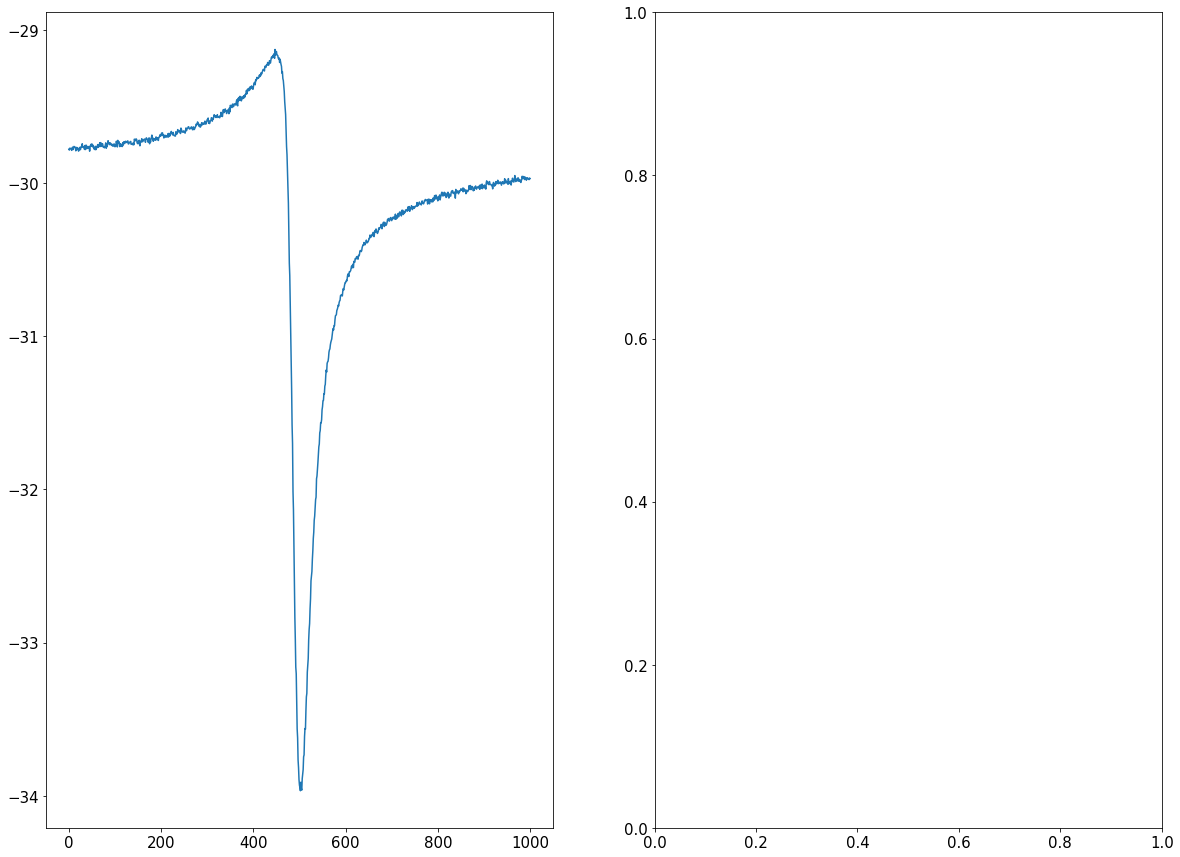

In [152]:
fig, ax = plt.subplots(1, 2, figsize=(20,15))
ax[0].plot(vna_data[5][0])

In [66]:
vna.set_nop(1001)
vna.set_band(10)

In [67]:
vna.get_band()

10.0

In [13]:
vna.get_nop()

1001

In [329]:
anri.set_band_Hz(5)

In [323]:
anri.set_nop(1001)

In [75]:
vna.get_avgs()

'10000\n'

In [82]:
vna.set_avgs(1000)

In [83]:
vna.get_sweep_time()

10.55054